In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings('ignore') #avoid the warning 

In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#We have TV,Radio,Newspaper and sales.How much we are investing on TV,Radio,
#Newspaper and how much this invsetment that impecting the sales.
#We need to predict the sales

In [5]:
#First removed Unnamed column because not need this column
#To remove unwanted column

In [6]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [9]:
#dataframe df is completely clean .Not performing EDA 
#Then checking the relationship of these columns
#hear independent variable =Tv ,radio,newspaper and dependent variable=sales

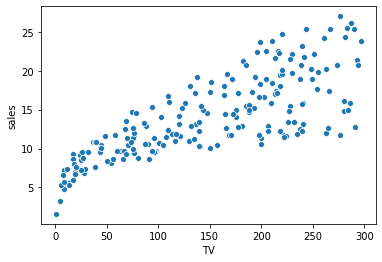

In [10]:
#Draw a scatter plot between TV and sales
plt.figure()
sns.scatterplot(data=df,x="TV",y="sales")
plt.show()

In [11]:
#Nice Upward growth that means as we investment more on TV then the sales is 
#also increasing means Good  co-relation between TV and sales means 
# +ve correlation

In [12]:
#same as rest of column itself means radio and sales

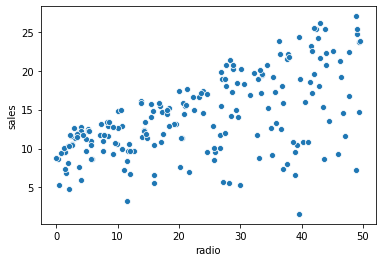

In [13]:
#Draw a scatter plot between radio and sales
plt.figure()
sns.scatterplot(data=df,x="radio",y="sales")
plt.show()

In [14]:
#see the plot ==>looks better but lot of data scattered ,+ve correlation
#But correlation value is very less like as compared to TV .

In [15]:
#At the End ==>Newspaper and sales

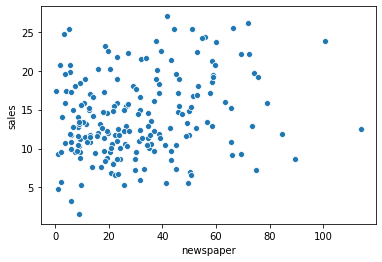

In [16]:
#Draw a scatter plot between newspaper and sales
plt.figure()
sns.scatterplot(data=df,x="newspaper",y="sales")
plt.show()

In [17]:
#It is very bad correlation .Scattered data all over ,show no +ve , no -ve 
#correlation just scattered ,very close to 0.not satisfied these plot 

In [18]:
#To check correlation 
cor=df.corr() #corr() inbuilt function to find the correlation

In [19]:
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [20]:
#Correlation between TV and sales =0.78 means very good correlation
#Correlation between radio and sales =0.57 means  good correlation
#Correlation between newspaper and sales =0.22 means bad correlation

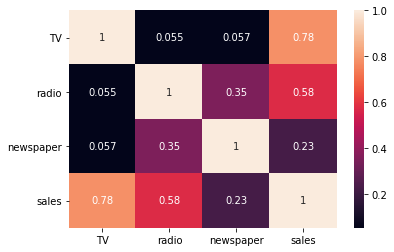

In [21]:
sns.heatmap(cor,annot=True)
plt.show()

In [22]:
#My observation Good correlation with TV and slightly radio

In [23]:
#Performing the Modeling
#Modeling with TV -->Linear regression 

In [24]:
#First select x AND y VARIABLES  y=mx+b

In [25]:
X=df[["TV"]] #[[ ]] -->linear regression algorithm by default as expecting a
#2 dimensional Array but in sense working with one column it cannot be
# 2 dimensional Array so it is making 2 dimensional array
Y=df["sales"]

In [26]:
#We have to split these data into train and test 
#test size=30% means 0.3
#call the function train_test_split() and return 4 output variables
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [27]:
#Perform the linear Regression model
#Create a object of LinearRegression class
lr=LinearRegression()

In [28]:
lr.fit(x_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
#Find slope and intercept 

In [30]:
lr.intercept_

6.923519536059554

In [31]:
lr.coef_  #find slope

array([0.04812204])

In [32]:
#y=mx+b   

In [33]:
#perform the Testing

In [34]:
y_pred=lr.predict(x_test)

In [35]:
y_pred

array([17.06764591, 16.66823297, 11.52879892, 20.4073156 , 19.1368937 ,
       20.57093054, 14.78184893, 15.62398466, 10.32093567, 17.2890073 ,
       14.83959538, 10.25356482, 17.25532187, 12.20731971, 17.78947654,
       12.97246017, 13.26119242, 20.91259704,  8.1554438 , 17.06283371,
       11.75497252, 10.18619396,  8.13138278, 12.09182681, 12.35649804,
       15.98971218,  8.99757953, 18.89628349, 14.95027608, 18.47762173,
       18.46799732, 18.2081383 , 14.12738917, 15.11389102, 18.87703468,
       15.82128503, 17.62586159, 13.15051172, 17.35637816,  7.86671155,
        7.55391828, 11.2737521 ,  7.82340171, 16.74522823,  7.27481044,
       14.01189627, 10.68666319, 17.89534503, 16.78853807, 17.96752809,
       20.864475  , 12.84734286,  7.85708714, 15.71060434, 19.70473379,
       14.89252963, 17.43818563,  8.12657058, 18.0926454 ,  8.99276733])

In [36]:
#Find Mean Squared Error
mean_squared_error(y_test,y_pred)

10.571057434656955

In [37]:
#find r2-score 
r2_score(y_test,y_pred)    #just fine

0.575061860494331

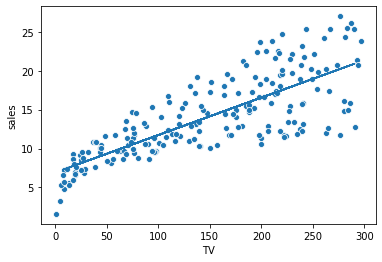

In [38]:
#plot
plt.figure()
sns.scatterplot(data=df,x="TV",y="sales")
plt.plot(x_test["TV"],y_pred)
plt.show()

In [39]:
#All the predicted values are on this fit line

In [40]:
#next step with radio
X=df[["radio"]] 
Y=df["sales"]

In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [42]:
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
#Find slope and intercept 
lr.intercept_

9.440936561425886

In [44]:
lr.coef_  #find slope

array([0.1874808])

In [45]:
y_pred=lr.predict(x_test)

In [46]:
y_pred

array([18.73998434, 13.62175845,  9.70340968, 11.33449266, 13.43427764,
       17.31513024, 15.3653299 , 11.46572922, 12.44062939, 13.86548349,
       13.35928532, 13.284293  , 13.94047581, 18.4025189 , 10.97827914,
       16.35897815, 12.89058332, 10.20960785, 16.75268784, 14.97162022,
       11.24075226, 16.30273391, 14.25919317, 12.06566779, 12.70310252,
       12.83433908, 14.44667397, 14.5216663 , 17.31513024, 12.57186595,
       17.22138984, 10.07837129, 16.11525311, 10.90328682, 15.10285678,
       13.3780334 , 10.07837129, 10.50957713, 17.67134377, 13.20930068,
        9.51592888,  9.4971808 , 11.70945427, 15.60905495, 14.7091471 ,
       13.92172773, 18.21503809, 16.5089628 , 17.89632073, 15.49656647,
       17.37137449, 15.92777231, 12.44062939, 18.10254961, 13.1905526 ,
       11.31574458, 10.45333289, 11.50322538, 11.05327146, 14.29668933])

In [47]:
mean_squared_error(y_test,y_pred)

14.604130559272193

In [48]:
r2_score(y_test,y_pred) 

0.41293932917162335

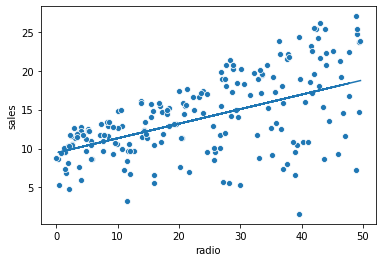

In [49]:
#plot
plt.figure()
sns.scatterplot(data=df,x="radio",y="sales")
plt.plot(x_test["radio"],y_pred)
plt.show()

In [50]:
#next step with newspaper
X=df[["newspaper"]] 
Y=df["sales"]

In [51]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [52]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
lr.intercept_

11.82966888487788

In [54]:
lr.coef_  #find slope

array([0.06532045])

In [55]:
y_pred=lr.predict(x_test)

In [56]:
mean_squared_error(y_test,y_pred)

25.497452374414927

In [57]:
r2_score(y_test,y_pred) 

-0.024953278429509007

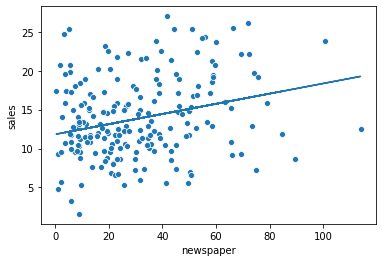

In [58]:
plt.figure()
sns.scatterplot(data=df,x="newspaper",y="sales")
plt.plot(x_test["newspaper"],y_pred)
plt.show()

In [59]:
#Multiple linear regression  of all independent variables

In [60]:
X=df[["TV","radio","newspaper"]]

In [61]:
Y=df["sales"]

In [62]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [63]:
lr=LinearRegression()

In [64]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
lr.intercept_

2.9372157346906125

In [66]:
lr.coef_  #find slope

array([0.04695205, 0.17658644, 0.00185115])

In [67]:
#TV and radio
X=df[["TV","radio"]]
Y=df["sales"]

In [68]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [69]:
lr=LinearRegression()

In [70]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
lr.intercept_

2.9647671191401574

In [72]:
lr.coef_  #find slope

array([0.04697554, 0.17765046])

In [73]:
#Not effect on Newspaper

In [74]:
#To perform prediction

In [75]:
y_pred=lr.predict(x_test)

In [76]:
mean_squared_error(y_test,y_pred)

1.9147050289721788

In [77]:
#MSE is very less

In [78]:
r2_score(y_test,y_pred)  

0.9230321850256801

In [79]:
#is very good model ,very near to 1

In [80]:
#Find residual

In [81]:
residuals=y_test-y_pred

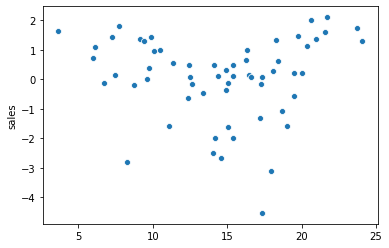

In [82]:
#we plot graph between residuals and y_pred
plt.figure()
sns.scatterplot(y_pred,residuals)
plt.show()

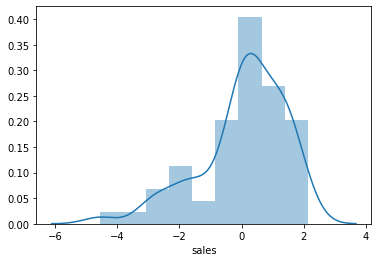

In [83]:
plt.figure()
sns.distplot(residuals)
plt.show()

In [84]:
#Polynomial Regression 

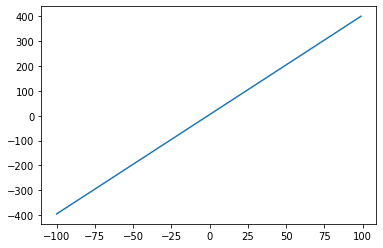

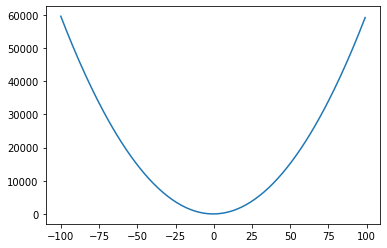

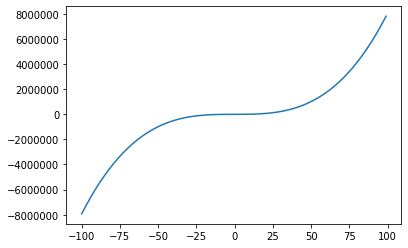

In [85]:
#We create a function 
#degree=1 and given the default value of m & b   eq. y=mx+b
#Linear 
def poly_1(x):
    y=4*x+5           #default m=4 and b=5
    return y

#Quadratic means degree=2  means y=m1x^2+m2x+b  (ax^2+bx+c)
def poly_2(x):
    y=6*(x**2)+4*x+5  #bydeafult m1=6 m2=4 b=5
    return y
#cubic means degree=3 means y=m1x^3+m2x^2+m3x+b 
def poly_3(x):
    y=8*(x**3)+6*(x**2)+4*x+5   #m1=8 m2=6 m3=4 b=5
    return y

#plot
def plot(x,y):
    plt.figure()
    plt.plot(x,y)
    plt.show()
    

#call in main()
x=np.arange(-100,100) #is very large array means so many values
#To check the linear relationship
y=poly_1(x)
plot(x,y)
#plot Quadratic relation
#Now taking out the Quadratic relationship
y=poly_2(x)
plot(x,y) # Show curve for quadratic equation

#Then lastly we can perform for cubic relationship as well
y=poly_3(x)
plot(x,y)  # for 2 curves for cubic relationship 
 

    

In [86]:
#Now We perform the Actual Polynomial Regression

In [87]:
#df=pd.read_csv('advertising.csv')

In [88]:
#df.head()

In [89]:
#df.drop("Unnamed: 0",axis=1,inplace=True)

In [90]:
#df.head()

In [91]:
X=df[["TV","radio"]]
y=df["sales"]

In [92]:
from sklearn.preprocessing import PolynomialFeatures

In [93]:
#Create the object of  PolynomialFeatures
pf= PolynomialFeatures(2) #pass How much degree 

In [94]:
#We create  polynomial version of x so we call pf.fit_transform()
x_poly=pf.fit_transform(X)  #hold x and power of x means x^2
#whats return polynomial version of that means the degree 2 means find degree of x means (x^2)

In [95]:
print(pd.DataFrame(x_poly))

       0      1     2         3         4        5
0    1.0  230.1  37.8  52946.01   8697.78  1428.84
1    1.0   44.5  39.3   1980.25   1748.85  1544.49
2    1.0   17.2  45.9    295.84    789.48  2106.81
3    1.0  151.5  41.3  22952.25   6256.95  1705.69
4    1.0  180.8  10.8  32688.64   1952.64   116.64
5    1.0    8.7  48.9     75.69    425.43  2391.21
6    1.0   57.5  32.8   3306.25   1886.00  1075.84
7    1.0  120.2  19.6  14448.04   2355.92   384.16
8    1.0    8.6   2.1     73.96     18.06     4.41
9    1.0  199.8   2.6  39920.04    519.48     6.76
10   1.0   66.1   5.8   4369.21    383.38    33.64
11   1.0  214.7  24.0  46096.09   5152.80   576.00
12   1.0   23.8  35.1    566.44    835.38  1232.01
13   1.0   97.5   7.6   9506.25    741.00    57.76
14   1.0  204.1  32.9  41656.81   6714.89  1082.41
15   1.0  195.4  47.7  38181.16   9320.58  2275.29
16   1.0   67.8  36.6   4596.84   2481.48  1339.56
17   1.0  281.4  39.6  79185.96  11143.44  1568.16
18   1.0   69.2  20.5   4788.64

In [96]:
#train and test 
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,random_state=1,test_size=0.3)

In [97]:
#Create the object of LinearRegression 

In [98]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
#We can perform the prediction then call predict()
y_pred=lr.predict(x_test) 

In [100]:
y_pred

array([24.18497316, 16.59028057,  9.31239826, 14.12243198, 17.50962016,
       25.08525155, 17.21885808, 13.27672069,  9.93379194, 17.30520603,
       14.98824505, 10.33491383, 17.39232299, 16.86043887, 13.34199391,
       16.1341335 , 13.20336001, 12.04127553,  8.7248546 , 18.73027022,
       10.55562743, 12.01635466,  7.81703194, 11.46435752, 12.21558775,
       15.14961473,  9.21098459, 19.19105105, 19.69634928, 15.90949303,
       23.28951339, 12.06798689, 17.33392072, 12.39075908, 20.13222128,
       15.72328031, 12.02866576, 10.96553528, 22.92370649,  7.097756  ,
        5.83529732,  9.00702775,  6.63663942, 19.37133669,  6.54733308,
       14.89257492, 14.10512194, 21.66925942, 22.63628645, 20.16785313,
       25.3868552 , 15.56831894,  6.87265843, 21.63080331, 17.27454861,
       12.74293463, 12.53255022,  6.96075012, 13.50624743,  9.13868327])

In [101]:

#Check mean squared error and r2-score
mean_squared_error(y_test,y_pred)   

0.17238345081004028

In [ ]:
#mse is very less ,it is very good to previous one

In [102]:
r2_score(y_test,y_pred)  #so great it is very close to 1 ,our assumption is correct 
#there is a polynomial relationship and because of great r2-score

0.9930704848288281

In [ ]:
#checkout the other assumption 

In [107]:
#calculate the residual 
residuals=y_test-y_pred


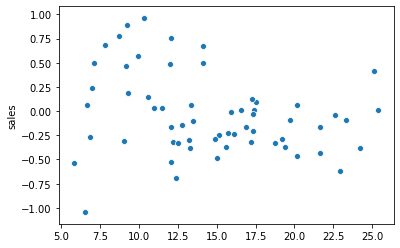

In [108]:
#After calculation the residual,plot the residuals and predicted value
plt.figure()
sns.scatterplot(y_pred,residuals)
plt.show()

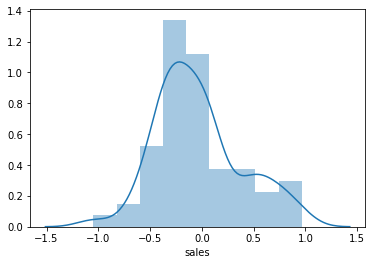

In [109]:
plt.figure()
sns.distplot(residuals)
plt.show()

In [ ]:
#very close to Normal distribution 
#Finally concluted the great result so we can see that all assumption .
# There is a polynomial regression. here r2_score ==>is very good.